# 🧠 FiftyOne Researcher Playground

👋 *By researchers, for researchers.*

This notebook demonstrates how to:

- Load diverse datasets (images, video, point clouds)
- Perform classification and detection tasks
- Use community and research plugins for advanced workflows
- Evaluate models and data quality

## 1️⃣ Install FiftyOne and Dependencies

In [16]:
!pip install fiftyone
!pip install torch torchvision torchaudio
!pip install huggingface_hub
!pip install umap-learn

  Using cached numba-0.60.0-cp39-cp39-macosx_11_0_arm64.whl.metadata (2.7 kB)
  Using cached llvmlite-0.43.0-cp39-cp39-macosx_11_0_arm64.whl.metadata (4.8 kB)
Using cached numba-0.60.0-cp39-cp39-macosx_11_0_arm64.whl (2.7 MB)
Using cached llvmlite-0.43.0-cp39-cp39-macosx_11_0_arm64.whl (28.8 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [umap-learn]4 [numba]


## 2️⃣ Load Datasets

In [14]:
import fiftyone as fo
import fiftyone.zoo as foz
import fiftyone.utils.huggingface as fouh
import fiftyone.zoo.models as fozm
import fiftyone.brain as fob

### Images

You can open the port 5152 to visualizate directly in the browser

Loading dataset
Importing samples...
 100% |███████████████| 5354/5354 [85.9ms elapsed, 0s remaining, 62.3K samples/s]  
Migrating dataset 'Voxel51/mvtec-ad' to v1.7.0



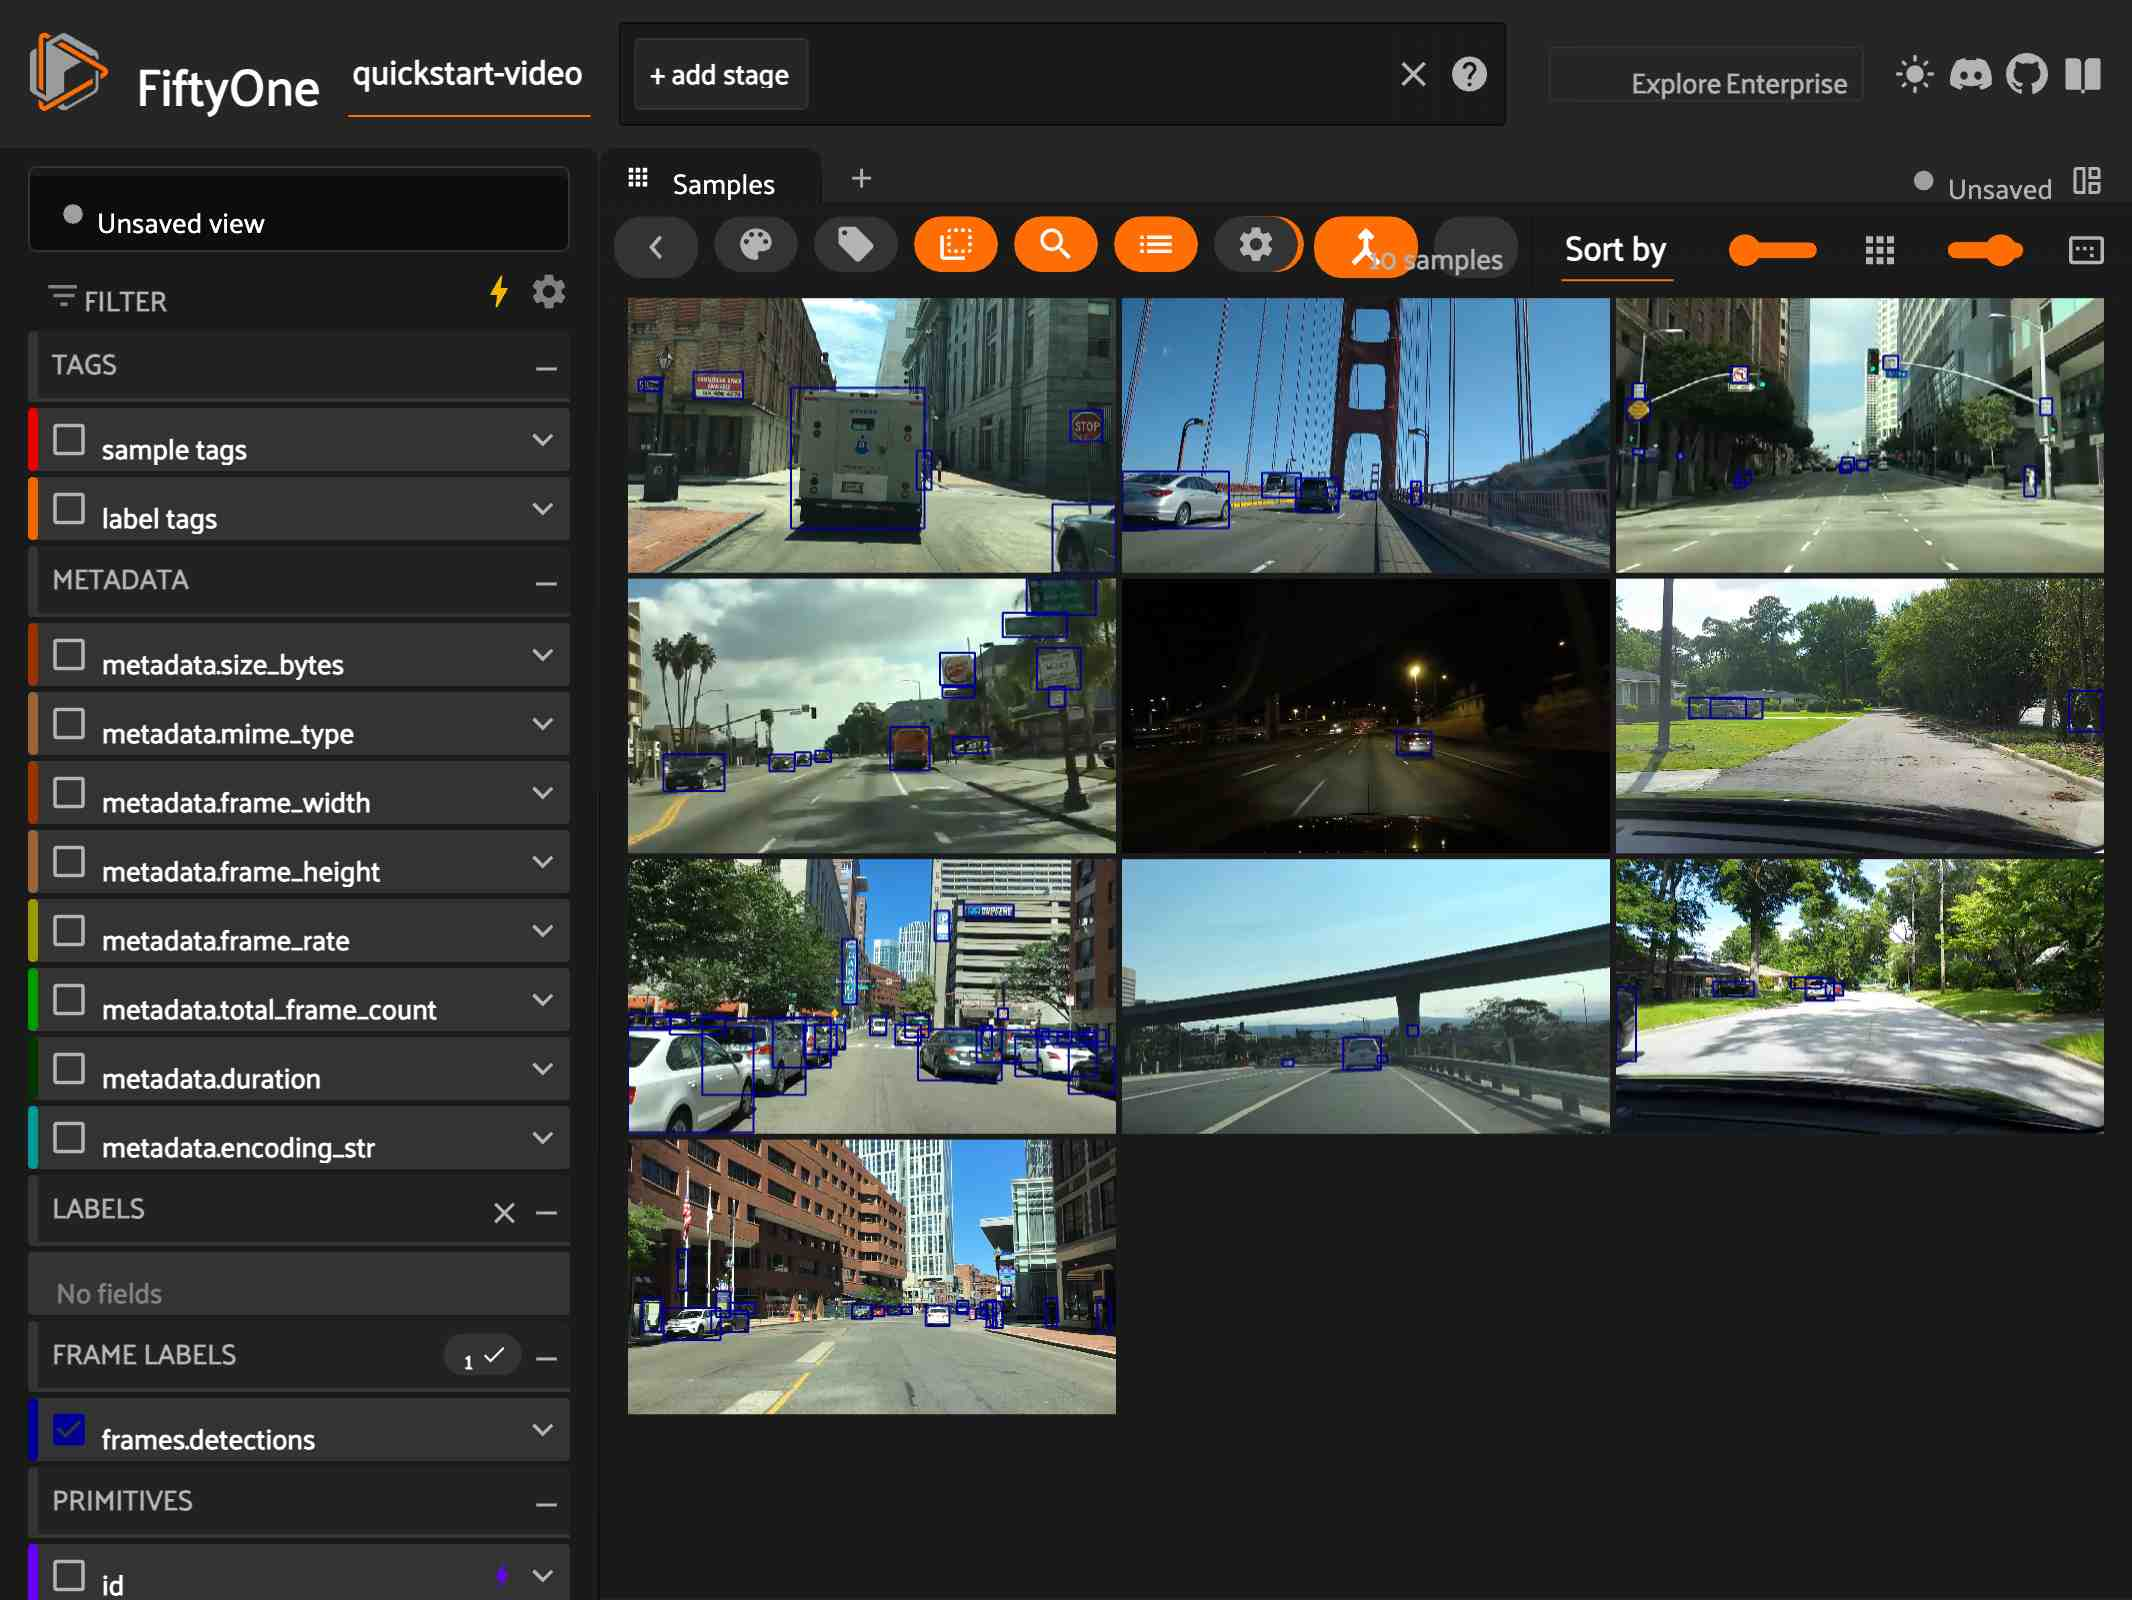

In [6]:
dataset_anomaly = fouh.load_from_hub("Voxel51/mvtec-ad", persistent=True, overwrite=True)
session = fo.launch_app(dataset_anomaly, port=5152)

### Video

Dataset already downloaded
Loading existing dataset 'quickstart-video'. To reload from disk, either delete the existing dataset or provide a custom `dataset_name` to use



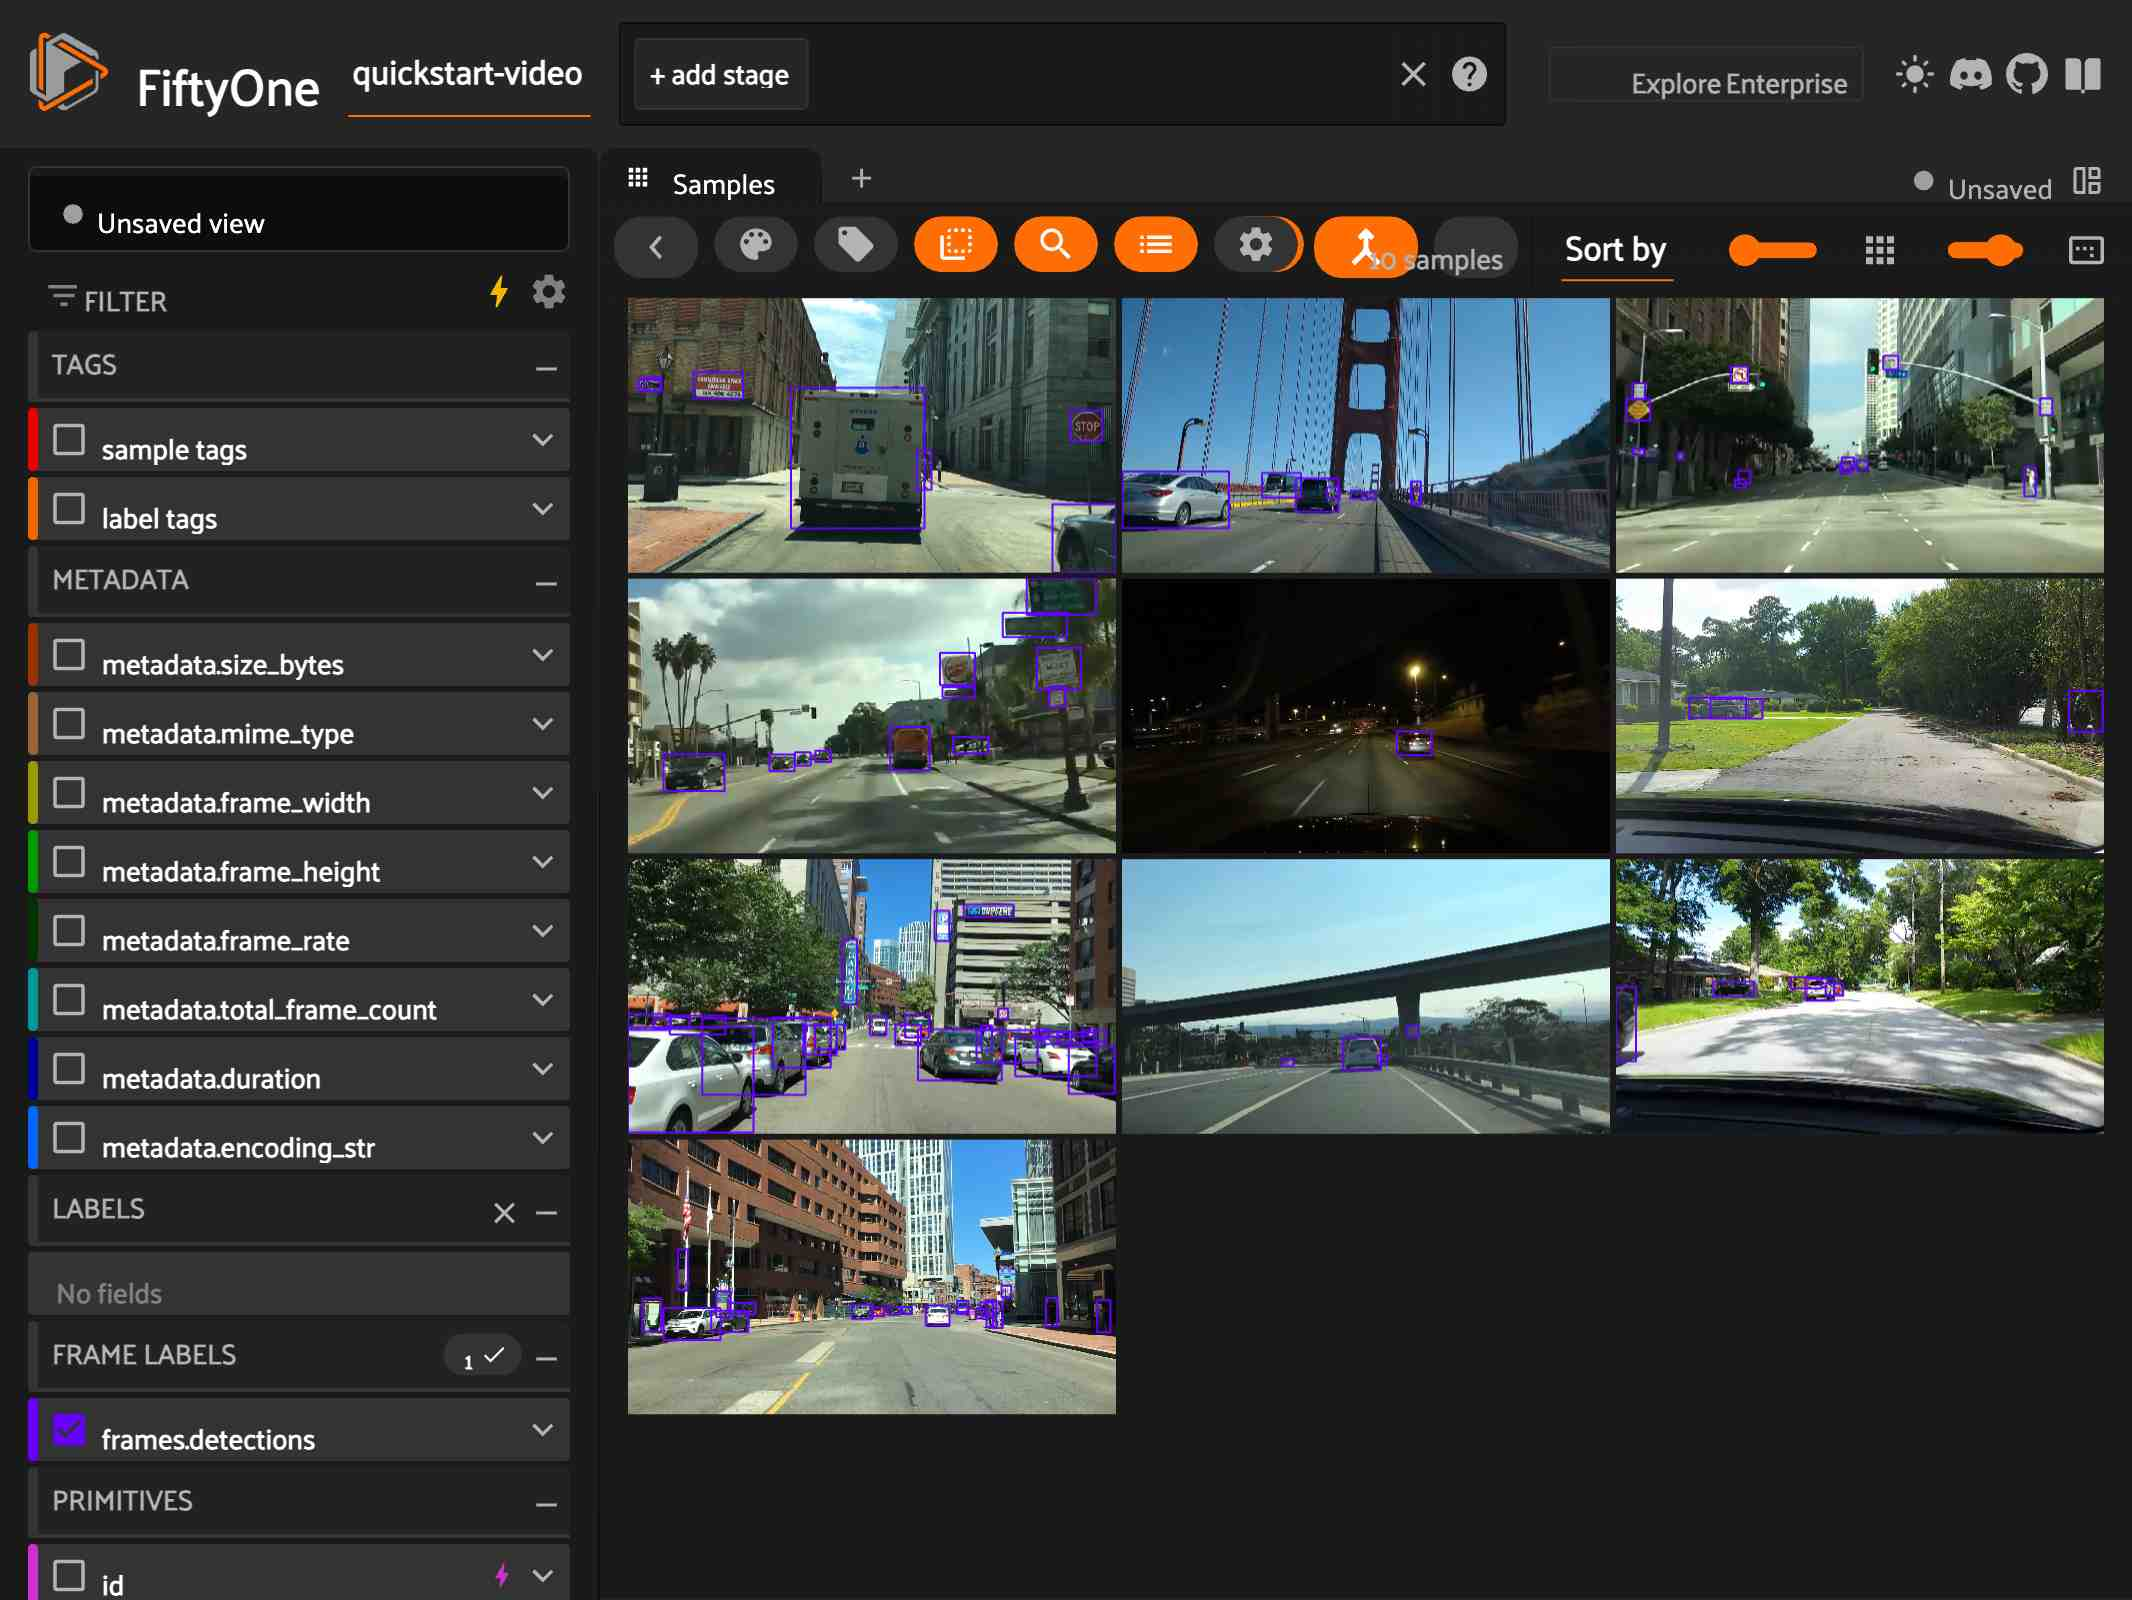

In [ ]:
video_dataset = foz.load_zoo_dataset("quickstart-video")
session = fo.launch_app(video_dataset, port=5152)

### Point Cloud

In [ ]:
pc_dataset = foz.load_zoo_dataset("quickstart-groups")
session = fo.launch_app(pc_dataset, port=5152)

Dataset already downloaded
Loading existing dataset 'quickstart-groups'. To reload from disk, either delete the existing dataset or provide a custom `dataset_name` to use


## 3️⃣ Perform Tasks
We can install plugin directly with the UI

### Explore and visualizate with embeddings
Once embeddings are generated, we can visualize them using dimensionality reduction techniques like:

UMAP (Uniform Manifold Approximation and Projection).

These methods reduce the high-dimensional feature space into 2D/3D representations for interactive visualization.

🔗 **Relevant Documentation:** [Visualizing Embeddings in FiftyOne](https://docs.voxel51.com/brain.html#visualizing-embeddings), [Dimensionality Reduction](https://docs.voxel51.com/brain.html#visualizing-embeddings)

In [17]:
# Load a pre-trained model (e.g., CLIP)
model = fozm.load_zoo_model("clip-vit-base32-torch")

fob.compute_visualization(
    dataset_anomaly,
    model=model,
    embeddings="mvtec_emb",
    brain_key="mvtec_embeddings",
    method="umap",  
    num_dims=2  
)

Computing embeddings...
 100% |███████████████| 5354/5354 [3.2m elapsed, 0s remaining, 10.9 samples/s]      
Generating visualization...
UMAP( verbose=True)
Mon Jul  7 14:11:32 2025 Construct fuzzy simplicial set
Mon Jul  7 14:11:32 2025 Finding Nearest Neighbors
Mon Jul  7 14:11:32 2025 Building RP forest with 9 trees
Mon Jul  7 14:11:34 2025 NN descent for 12 iterations
	 1  /  12
	 2  /  12
	 3  /  12
	Stopping threshold met -- exiting after 3 iterations
Mon Jul  7 14:11:39 2025 Finished Nearest Neighbor Search
Mon Jul  7 14:11:41 2025 Construct embedding


Epochs completed:  19%| █▉         97/500 [00:01]

	completed  0  /  500 epochs
	completed  50  /  500 epochs


Epochs completed:  38%| ███▊       188/500 [00:01]

	completed  100  /  500 epochs
	completed  150  /  500 epochs


Epochs completed:  57%| █████▋     287/500 [00:01]

	completed  200  /  500 epochs
	completed  250  /  500 epochs


Epochs completed:  77%| ███████▋   387/500 [00:01]

	completed  300  /  500 epochs
	completed  350  /  500 epochs


Epochs completed:  97%| █████████▋ 486/500 [00:01]

	completed  400  /  500 epochs
	completed  450  /  500 epochs


Epochs completed: 100%| ██████████ 500/500 [00:01]


Mon Jul  7 14:11:43 2025 Finished embedding


In [19]:
dataset_anomaly.reload()

### Classification

In [ ]:
for sample in dataset:
    sample["predictions"] = fo.Classification(label="example_label")
    sample.save()
session.refresh()

### Object Detection

In [ ]:
coco_dataset = foz.load_zoo_dataset("coco-2017", split="validation", max_samples=50)
session = fo.launch_app(coco_dataset)

### Zero shot detection

## 4️⃣ Plugin Integrations

Below are plugins you can activate in the App sidebar:

- **Image Quality Issues** (detect blur/noise)
- **Image Deduplication**
- **Semantic Document Search**
- **Visual Question Answering about your data**
- **Outlier Detection**
- **Sparse Concepts (Find Bias)** *(by Adonai)*
- **Validate VLM Efficiency** *(by Adonai)*
- **VoxelGPT** *(by Adonai)*

Example:

👉 **Activate Image Deduplication**:
- Open the FiftyOne App
- Click `Plugins` > `Image Deduplication`
- Run deduplication and view results

## 5️⃣ Evaluation Metrics

### Classification Metrics

In [ ]:
results = dataset.evaluate_classifications(
    "predictions",
    gt_field="ground_truth",
    eval_key="eval"
)
print("Accuracy:", results.accuracy())

### Detection Metrics

In [ ]:
det_results = coco_dataset.evaluate_detections(
    "predictions",
    gt_field="ground_truth",
    eval_key="eval"
)
print("mAP:", det_results.mAP())

## ✅ Conclusion

You now have a workflow to:
- Load datasets
- Visualize and explore data
- Perform ML tasks
- Integrate plugins to improve and analyze your data
- Evaluate models with metrics

🎓 *Built for researchers who want transparency, reproducibility, and flexibility.*